<a href="https://colab.research.google.com/github/elyselee/Launch-Bootcamp-/blob/master/Copy_of_GridSearch%26RandomSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [0]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [0]:
import pandas as pd
traint = pd.read_csv('train.csv')
traindf=pd.read_csv('train.csv')
traindf.head()
traint.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [0]:
import numpy as np
import matplotlib
TARGET = 'SalePrice'
NROWS = None
y_train = np.log(traindf[TARGET]+1)


traindf.drop([TARGET], axis=1, inplace=True)


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr

alltrain =traindf.loc[:,'MSSubClass':'SaleCondition']
numeric_feats = alltrain.dtypes[alltrain.dtypes != "object"].index

skewed_feats = traindf[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

alltrain[skewed_feats] = np.log1p(alltrain[skewed_feats])

alltrain = pd.get_dummies(alltrain)


In [0]:
alltrain = pd.get_dummies(alltrain)
#filling NA's with the mean of the column:
alltrain = alltrain.fillna(alltrain.mean())


In [0]:
#creating matrices for sklearn:
SEED = 0
from sklearn.model_selection import train_test_split

x_train = np.array(alltrain[:traindf.shape[0]])

x_fit,x_test,y_fit,y_test = train_test_split(x_train, y_train, train_size =0.33, 
                            random_state=SEED)

In [0]:
alltrain.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,...,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,4.189655,9.042040,7,5,2003,2003,5.283204,6.561031,0.0,5.017280,6.753438,6.753438,6.751101,0.0,7.444833,1,0.000000,2,1,3,0.693147,8,0,2003.0,2,548,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.0,2,2008,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,3.044522,4.394449,9.169623,6,8,1976,1976,0.000000,6.886532,0.0,5.652489,7.141245,7.141245,0.000000,0.0,7.141245,0,0.693147,2,0,3,0.693147,6,1,1976.0,2,460,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.0,5,2007,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,4.110874,4.234107,9.328212,7,5,2001,2002,5.093750,6.188264,0.0,6.075346,6.825460,6.825460,6.765039,0.0,7.488294,1,0.000000,2,1,3,0.693147,6,1,2001.0,2,608,0.000000,3.761200,0.000000,0.0,0.0,0.0,0.0,9,2008,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,4.262680,4.110874,9.164401,7,5,1915,1970,0.000000,5.379897,0.0,6.293419,6.629363,6.869014,6.629363,0.0,7.448916,1,0.000000,1,0,3,0.693147,7,1,1998.0,3,642,0.000000,3.583519,5.609472,0.0,0.0,0.0,0.0,2,2006,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,4.110874,4.442651,9.565284,8,5,2000,2000,5.860786,6.486161,0.0,6.196444,7.044033,7.044033,6.960348,0.0,7.695758,1,0.000000,2,1,4,0.693147,9,1,2000.0,3,836,5.262690,4.442651,0.000000,0.0,0.0,0.0,0.0,12,2008,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(traindf.values)
    rmse= np.sqrt(-cross_val_score(model, alltrain.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [0]:
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
lasso_model = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
score = rmsle_cv(lasso_model
print("Lasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Lasso score: 0.1226 (0.0162)



In [0]:
from sklearn.linear_model import ElasticNet
Elasticnet_model = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1226 (0.0163)



In [0]:
GradientBoost_model = GradientBoostingRegressor(n_estimators=1000)
score = rmsle_cv(GradientBoost_model)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1227 (0.0108)



In [0]:
y = np.log1p(traint.SalePrice)

In [0]:
y = np.log1p(train.SalePrice)
RandomForestRegressor(n_estimators=10)

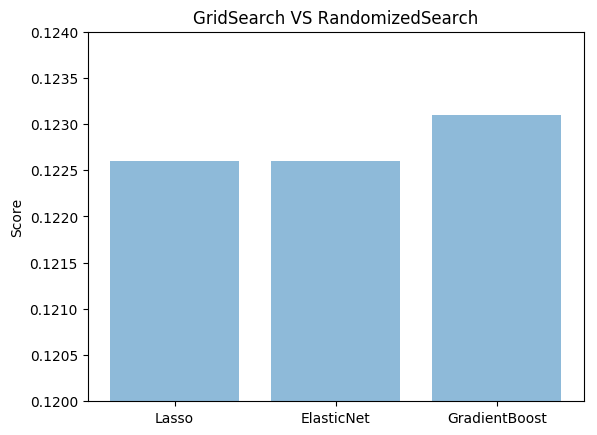

In [0]:
objects = ('Lasso', 'ElasticNet', 'GradientBoost')
y_pos = np.arange(len(objects))
performance = [0.1226, 0.1226, 0.1231]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Score')
plt.title('GridSearch VS RandomizedSearch')
plt.ylim(0.12, 0.124)

plt.show()

In [0]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators": [200, 500],
    "max_depth": [3, None],
    "max_features": [1, 3],
    "min_samples_split": [5, 10],
    "min_samples_leaf": [5, 10],
    "bootstrap": [True, False]}

#rfmodel = RandomForestRegressor(random_state=0)
#rfgrid = GridSearchCV(estimator=rfmodel, param_grid=param_grid, n_jobs=-1)
rfrandom_search =RandomizedSearchCV(RandomForestRegressor(random_state=0),param_grid,  n_iter=100, cv=5, verbose=0, n_jobs=-1)


In [0]:
#rfgrid.fit(x_train, y_train)
rfrandom_search.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 64 is smaller than n_iter=100. Running 64 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_state=0

In [0]:
#rfgrid.best_params_ 
rfrandom_search.best_params_ 

{'bootstrap': False,
 'max_depth': None,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 500}

In [0]:
#rfgrid.score(x_train, y_train)
randomforest_score=rfrandom_search.score(x_train,y_train)
print(randomforest_score)

0.7431364189170747


In [0]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1, 5, 10]}
rrandom=RandomizedSearchCV(ridge, parameters, cv = 5)


In [0]:
rrandom.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=False,
                                   random_state=None, solver='auto',
                                   tol=0.001),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'alpha': [1, 5, 10]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [0]:
rrandom.best_params_ 

{'alpha': 10}

In [0]:
ridge_score=rrandom.score(x_train,y_train)
print(ridge_score)

0.9299579771565469


In [0]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
num_estimators = [500,1000]
learn_rates = [0.02, 0.05]
max_depths = [1, 2]
min_samples_leaf = [5,10]
min_samples_split = [5,10]

parameters = {'n_estimators': num_estimators,
              'learning_rate': learn_rates,
              'max_depth': max_depths,
              'min_samples_leaf': min_samples_leaf,
              'min_samples_split': min_samples_split}

random_search =RandomizedSearchCV(GradientBoostingRegressor(loss='huber'), parameters, random_state=1, n_iter=100, cv=5, verbose=0, n_jobs=-1)


In [0]:
random_search.fit(x_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 32 is smaller than n_iter=100. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=GradientBoostingRegressor(alpha=0.9,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='huber',
                                                       max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       

In [0]:
random_search.best_params_ 

{'learning_rate': 0.05,
 'max_depth': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 1000}

In [0]:
gboost_score=random_search.score(x_train,y_train)
print(gboost_score)

0.9593680864100839


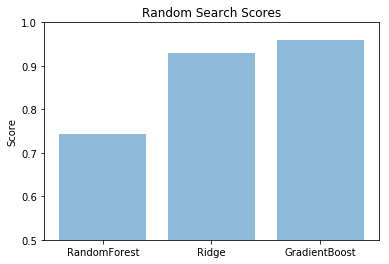

In [0]:

objects = ('RandomForest','Ridge','GradientBoost')
y_pos = np.arange(len(objects))
performance = [randomforest_score, ridge_score,gboost_score]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Score')
plt.title('Random Search Scores')
plt.ylim(0.5, 1)

plt.show()

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

num_estimators = [500,1000]
learn_rates = [0.02, 0.05]
max_depths = [1, 2]
min_samples_leaf = [5,10]
min_samples_split = [5,10]

parameters = {'n_estimators': num_estimators,
              'learning_rate': learn_rates,
              'max_depth': max_depths,
              'min_samples_leaf': min_samples_leaf,
              'min_samples_split': min_samples_split}

grid_search = GridSearchCV(GradientBoostingRegressor(loss='huber'),
                           parameters, cv=3, return_train_score=True)
grid_search.fit(x_train, y_train)



GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='huber', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_i...
                             

In [0]:
grid_search.best_params_  

{'learning_rate': 0.05,
 'max_depth': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 1000}

In [0]:
grid_search.score(x_train, y_train)

0.9594164577940154

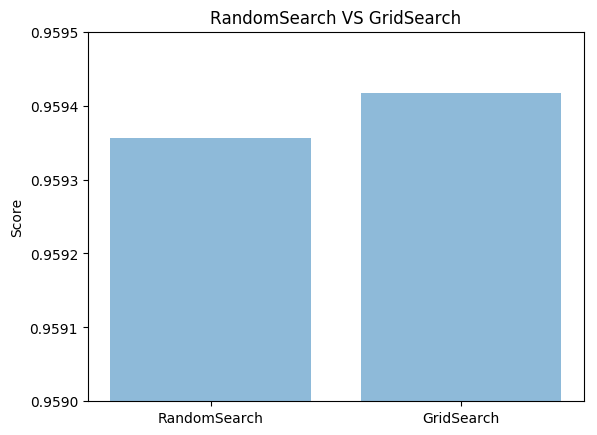

In [0]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('RandomSearch','GridSearch')
y_pos = np.arange(len(objects))
performance = [0.9593559496914748, 0.9594164577940154,]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Score')
plt.title('RandomSearch VS GridSearch')
plt.ylim(0.959, 0.9595)

plt.show()